# Daugman Algorithm demo

## Imports & prerequisites

In [1]:
import os
import numpy as np
from skimage.io import imread
import matplotlib.pyplot as plt
from utils import *

In [2]:
base_dirs = {
        "images": "data/images",
        "extracted_irises": "data/extracted_irises",
        "irises": "data/irises",
        "pupils": "data/pupils",
    }

extracted_irises_dir = base_dirs["extracted_irises"]

## Sample image loaded

(470, 1410)

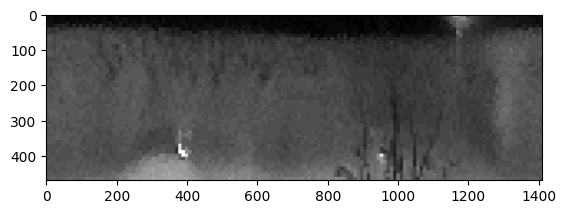

In [3]:
sample_image = imread("data/extracted_irises/left/38-1.png")[:, :, 0]
plt.imshow(sample_image, cmap="gray")
sample_image.shape

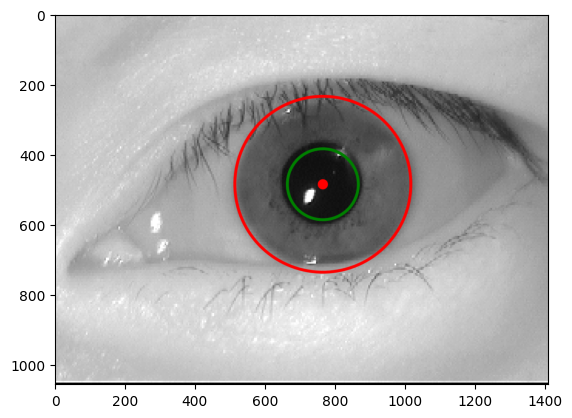

In [4]:
original_image = imread("data/images/left/38-1.png")
plt.imshow(original_image, cmap="gray")

(440, 1410)

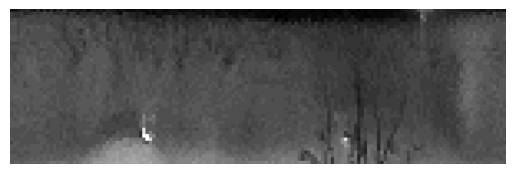

In [5]:
rows_to_remove = sample_image.shape[0] - 440
cropped_image = sample_image[rows_to_remove:, :]

plt.imshow(cropped_image, cmap="gray")
plt.axis("off")

cropped_image.shape

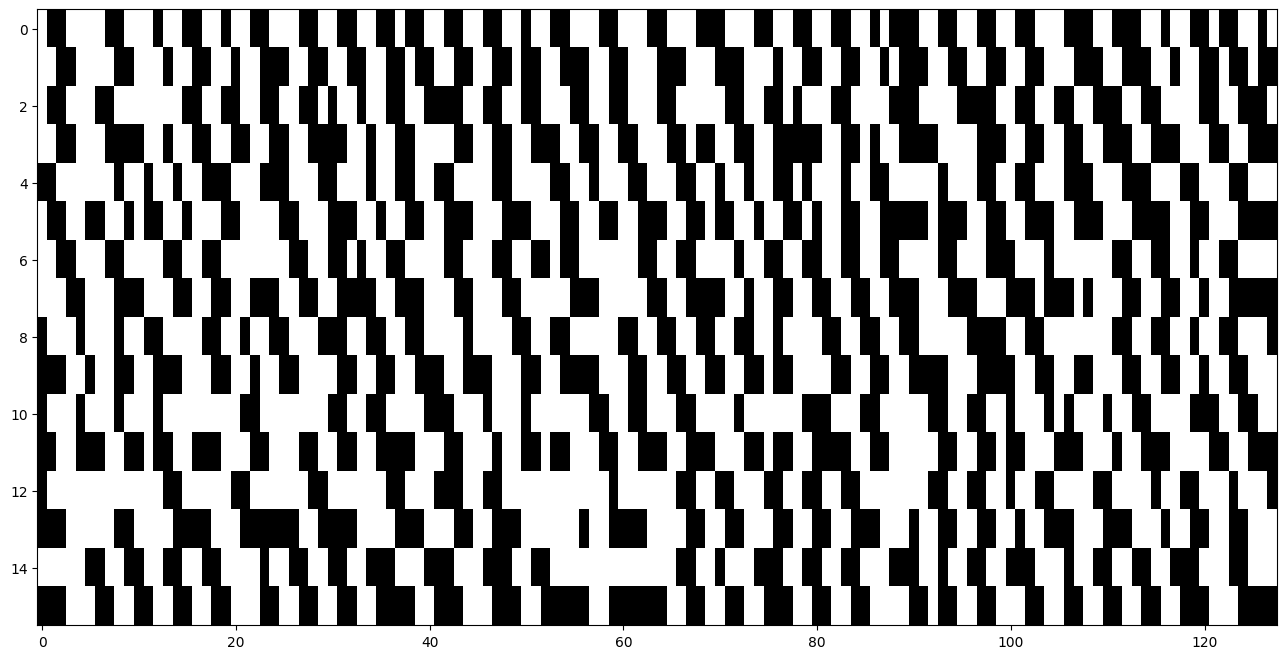

In [6]:
sample_iris_code = image_to_iris_code_2(sample_image, plot_iris_code=True)

# Comparisons

## Same Eye

In [ ]:
iris_codes = []
filenames = []

start_index = 6
# Process the first 5 iris images
for filename in os.listdir(extracted_irises_dir+"/left")[start_index:start_index+10]:
    if filename.endswith(".png"):
        print(f"Processing: {filename}")
        image = imread(os.path.join(extracted_irises_dir, "left", filename))[:, :, 0]
        iris_code = image_to_iris_code(image)
        iris_codes.append(iris_code)
        filenames.append(filename)

# Calculate Hamming distances between the first iris code and all others
if iris_codes:
    reference_code = iris_codes[0]
    distances = []
    
    # Calculate distances and print them
    for i, code in enumerate(iris_codes):
        distance = hamming_distance(reference_code, code)
        distances.append(distance)
        print(f"Hamming distance between {filenames[0]} and {filenames[i]}: {distance:.4f}")
    
    # Plot the distances
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(distances)), distances)
    plt.axhline(y=0.5, color='r', linestyle='--', label='Random match threshold (0.5)')
    plt.xticks(range(len(distances)), filenames, rotation=45)
    plt.xlabel('Iris Images')
    plt.ylabel('Hamming Distance')
    plt.title(f'Hamming Distance from Reference Image ({filenames[0]})')
    plt.ylim(0, 1)  # Hamming distance is between 0 and 1
    plt.tight_layout()
    plt.legend()
    plt.show()
    
    # Also visualize a comparison between the reference code and one other code
    if len(iris_codes) > 1:
        # Import the function we created earlier or define it here
        def plot_iris_code_comparison(left_code, right_code, cmap="gray"):
            """
            Visualise the comparison between two iris codes.
            Shows left code, right code, and their differences.
            """
            # Calculate the differences between the codes
            differences = left_code != right_code
            
            # Create figure with subplots
            fig, axes = plt.subplots(1, 3, figsize=(15, 3))
            
            # Plot reference code
            axes[0].imshow(left_code, cmap=cmap, aspect="auto", interpolation="nearest")
            axes[0].set_title(f'Reference Code ({filenames[0]})')
            axes[0].axis("off")
            
            # Plot second code
            axes[1].imshow(right_code, cmap=cmap, aspect="auto", interpolation="nearest")
            axes[1].set_title(f'Comparison Code ({filenames[1]})')
            axes[1].axis("off")
            
            # Plot differences
            axes[2].imshow(differences, cmap="Reds", aspect="auto", interpolation="nearest")
            axes[2].set_title(f'Differences (HD: {hamming_distance(left_code, right_code):.4f})')
            axes[2].axis("off")
            
            plt.tight_layout()
            plt.show()
        
        # Compare reference code with the second code
        plot_iris_code_comparison(reference_code, iris_codes[1])

# OLD SOLUTION

### Split into 8 rows

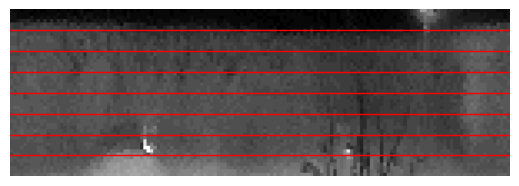

In [7]:
plt.figure(figsize=(5, 15))
plt.imshow(sample_image, cmap="gray")


# sample_image = sample_image[]

height, width = sample_image.shape[:2]
row_height = height / 8

for i in range(1, 8):
    y_position = i * row_height
    plt.axhline(y=y_position, color='r', linestyle='-', linewidth=1)

plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [8]:
sample_image.shape[0]

470

In [9]:
number_of_bands = 8
band_height = cropped_image.shape[0] // number_of_bands
bands = []
for i in range(number_of_bands):
    start_row = i * band_height
    end_row = (i + 1) * band_height if i != number_of_bands - 1 else cropped_image.shape[0]
    band = cropped_image[start_row:end_row, :]
    bands.append(band)
    print(band.shape)


(55, 1410)
(55, 1410)
(55, 1410)
(55, 1410)
(55, 1410)
(55, 1410)
(55, 1410)
(55, 1410)


In [10]:
import copy


In [11]:
bands_specifications = {
    # Bands 0-3: Top cutout 130, no bottom cutout
    **{str(i): {"top_cutout_width": 130, "bottom_cutout_width": 0} for i in range(4)},
    
    # Bands 4-5: Top cutout 322, bottom cutout 320
    **{str(i): {"top_cutout_width": 322, "bottom_cutout_width": 320} for i in range(4, 6)},
    
    # Bands 6-7: Top cutout 386, bottom cutout 384
    **{str(i): {"top_cutout_width": 386, "bottom_cutout_width": 384} for i in range(6, 8)}
}

cropped_bands = []

for i in range(8):
    top_cutout_width = bands_specifications[str(i)]["top_cutout_width"]
    bottom_cutout_width = bands_specifications[str(i)]["bottom_cutout_width"]
    
    band = copy.deepcopy(bands[i])


    top_band = copy.deepcopy(band)[:, band.shape[1] // 2:]
    bottom_band = band[:, :band.shape[1] // 2].copy()
    
    print(f"Original shapes - band: {band.shape}, top_band: {top_band.shape}, bottom_band: {bottom_band.shape}")
    
    top_center = top_band.shape[1] // 2
    bottom_center = bottom_band.shape[1] // 2

    if top_cutout_width > 0:
        top_start = top_center - top_cutout_width // 2
        top_end = top_center + top_cutout_width // 2
        top_start = max(0, top_start)
        top_end = min(top_band.shape[1], top_end)
        top_band_cropped = np.delete(top_band, np.s_[top_start:top_end], axis=1)
    else:
        top_band_cropped = top_band
    
    if bottom_cutout_width > 0:
        bottom_start = bottom_center - bottom_cutout_width // 2
        bottom_end = bottom_center + bottom_cutout_width // 2        
        bottom_start = max(0, bottom_start)
        bottom_end = min(bottom_band.shape[1], bottom_end)
        bottom_band_cropped = np.delete(bottom_band, np.s_[bottom_start:bottom_end], axis=1)
    else:
        bottom_band_cropped = bottom_band
    
    print(f"Cropped shapes - top_band: {top_band_cropped.shape}, bottom_band: {bottom_band_cropped.shape}", end=" ")
    combined_band = np.concatenate((bottom_band_cropped, top_band_cropped), axis=1)
    print(f"Combined band shape: {combined_band.shape}")
    cropped_bands.append(combined_band.copy())


# rescale to 128x1
def downsample_to_128(band):
    h, w = band.shape[:2]
    # 1) average across rows → shape (w,)
    col_means = band.mean(axis=0)
    # 2) compute group size (must divide evenly)
    group_size = w // 128
    # 3) reshape into (128, group_size) and average each
    #    shape will be (128,)
    out = col_means.reshape(128, group_size).mean(axis=1)
    # 4) return as a 1×128 “image” if you need that shape
    return out[np.newaxis, :]

# apply to all bands
cropped_bands_rescaled = np.stack([downsample_to_128(b) for b in cropped_bands], axis=0)


Original shapes - band: (55, 1410), top_band: (55, 705), bottom_band: (55, 705)
Cropped shapes - top_band: (55, 575), bottom_band: (55, 705) Combined band shape: (55, 1280)
Original shapes - band: (55, 1410), top_band: (55, 705), bottom_band: (55, 705)
Cropped shapes - top_band: (55, 575), bottom_band: (55, 705) Combined band shape: (55, 1280)
Original shapes - band: (55, 1410), top_band: (55, 705), bottom_band: (55, 705)
Cropped shapes - top_band: (55, 575), bottom_band: (55, 705) Combined band shape: (55, 1280)
Original shapes - band: (55, 1410), top_band: (55, 705), bottom_band: (55, 705)
Cropped shapes - top_band: (55, 575), bottom_band: (55, 705) Combined band shape: (55, 1280)
Original shapes - band: (55, 1410), top_band: (55, 705), bottom_band: (55, 705)
Cropped shapes - top_band: (55, 383), bottom_band: (55, 385) Combined band shape: (55, 768)
Original shapes - band: (55, 1410), top_band: (55, 705), bottom_band: (55, 705)
Cropped shapes - top_band: (55, 383), bottom_band: (55, 

In [12]:
def crop_and_average_bands(bands):

    bands_specifications = {
        # Bands 0-3: Top cutout 130, no bottom cutout
        **{str(i): {"top_cutout_width": 130, "bottom_cutout_width": 0} for i in range(4)},
        
        # Bands 4-5: Top cutout 322, bottom cutout 320
        **{str(i): {"top_cutout_width": 322, "bottom_cutout_width": 320} for i in range(4, 6)},
        
        # Bands 6-7: Top cutout 386, bottom cutout 384
        **{str(i): {"top_cutout_width": 386, "bottom_cutout_width": 384} for i in range(6, 8)}
    }

    cropped_bands = []

    for i in range(8):
        top_cutout_width = bands_specifications[str(i)]["top_cutout_width"]
        bottom_cutout_width = bands_specifications[str(i)]["bottom_cutout_width"]
        
        band = copy.deepcopy(bands[i])


        top_band = copy.deepcopy(band)[:, band.shape[1] // 2:]
        bottom_band = band[:, :band.shape[1] // 2].copy()
        
        print(f"Original shapes - band: {band.shape}, top_band: {top_band.shape}, bottom_band: {bottom_band.shape}")
        
        top_center = top_band.shape[1] // 2
        bottom_center = bottom_band.shape[1] // 2

        if top_cutout_width > 0:
            top_start = top_center - top_cutout_width // 2
            top_end = top_center + top_cutout_width // 2
            top_start = max(0, top_start)
            top_end = min(top_band.shape[1], top_end)
            top_band_cropped = np.delete(top_band, np.s_[top_start:top_end], axis=1)
        else:
            top_band_cropped = top_band
        
        if bottom_cutout_width > 0:
            bottom_start = bottom_center - bottom_cutout_width // 2
            bottom_end = bottom_center + bottom_cutout_width // 2        
            bottom_start = max(0, bottom_start)
            bottom_end = min(bottom_band.shape[1], bottom_end)
            bottom_band_cropped = np.delete(bottom_band, np.s_[bottom_start:bottom_end], axis=1)
        else:
            bottom_band_cropped = bottom_band
        
        print(f"Cropped shapes - top_band: {top_band_cropped.shape}, bottom_band: {bottom_band_cropped.shape}", end=" ")
        combined_band = np.concatenate((bottom_band_cropped, top_band_cropped), axis=1)
        print(f"Combined band shape: {combined_band.shape}")
        cropped_bands.append(combined_band.copy())


    # rescale to 128x1
    def downsample_to_128(band):
        h, w = band.shape[:2]
        # 1) average across rows → shape (w,)
        col_means = band.mean(axis=0)
        # 2) compute group size (must divide evenly)
        group_size = w // 128
        # 3) reshape into (128, group_size) and average each
        #    shape will be (128,)
        out = col_means.reshape(128, group_size).mean(axis=1)
        # 4) return as a 1×128 “image” if you need that shape
        return out[np.newaxis, :]

    # apply to all bands
    cropped_bands_rescaled = np.stack([downsample_to_128(b) for b in cropped_bands], axis=0)
    return cropped_bands_rescaled


shapes: (55, 1410) (55, 1280) (1, 128) → (55, 128)
shapes: (55, 1410) (55, 1280) (1, 128) → (55, 128)
shapes: (55, 1410) (55, 1280) (1, 128) → (55, 128)
shapes: (55, 1410) (55, 1280) (1, 128) → (55, 128)
shapes: (55, 1410) (55, 768) (1, 128) → (55, 128)
shapes: (55, 1410) (55, 768) (1, 128) → (55, 128)
shapes: (55, 1410) (55, 640) (1, 128) → (55, 128)
shapes: (55, 1410) (55, 640) (1, 128) → (55, 128)


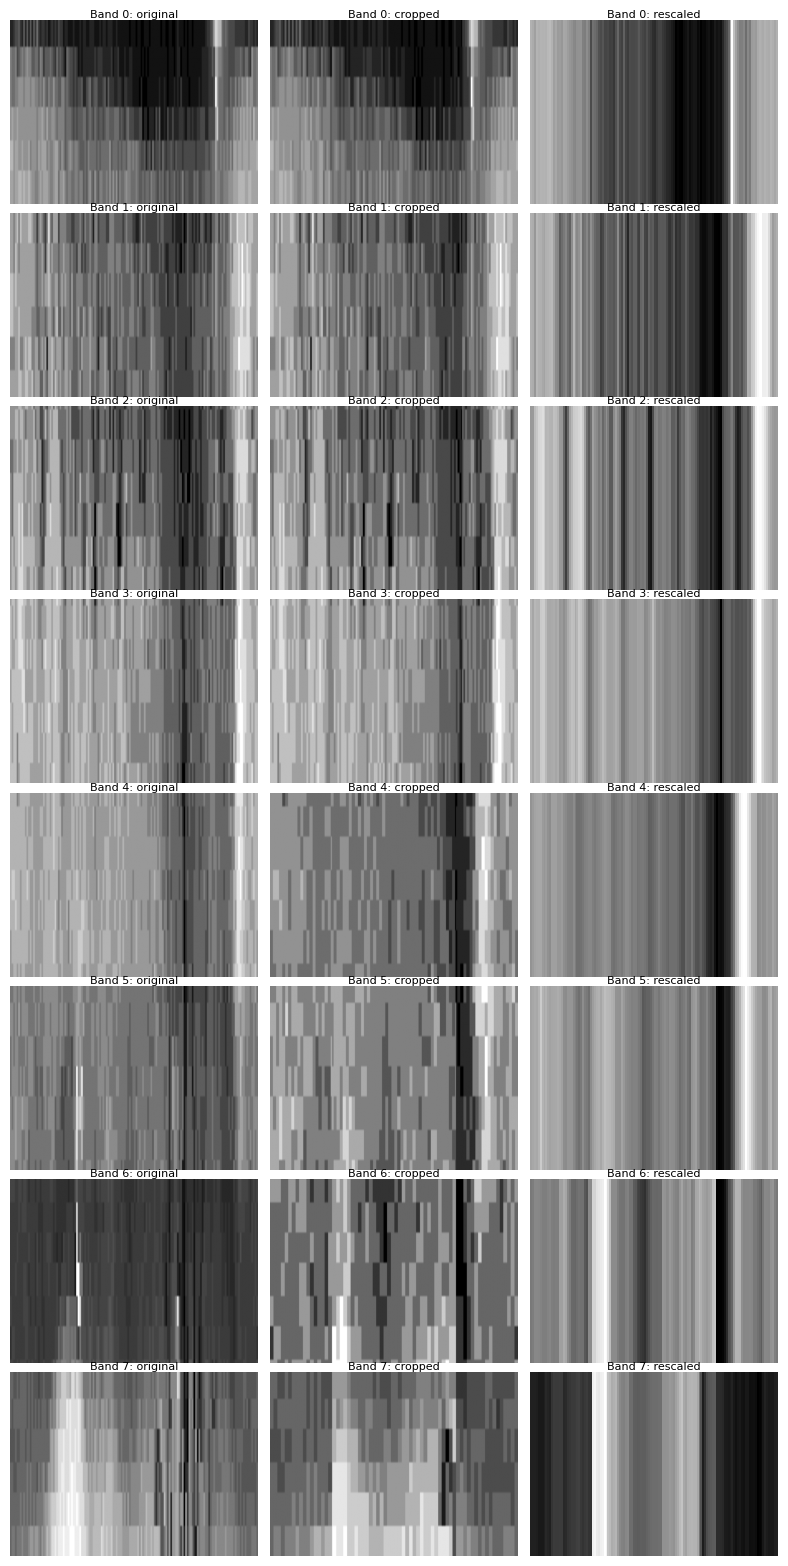

In [13]:
fig, axes = plt.subplots(
    nrows=8, ncols=3,
    figsize=(8, 16),
    gridspec_kw={'hspace': 0.05, 'wspace': 0.05}
)

for i in range(8):
    # 1) original
    ax = axes[i, 0]
    ax.imshow(bands[i], cmap='gray', aspect='auto')
    ax.axis('off')
    ax.set_title(f'Band {i}: original', pad=2, fontsize=8)

    # 2) cropped
    ax = axes[i, 1]
    ax.imshow(cropped_bands[i], cmap='gray', aspect='auto')
    ax.axis('off')
    ax.set_title(f'Band {i}: cropped', pad=2, fontsize=8)

    # 3) rescaled (1×128 → repeat to 55×128)
    ax = axes[i, 2]
    one_row = cropped_bands_rescaled[i]                # shape (1,128)
    height = bands[i].shape[0]                         # should be 55
    full = np.repeat(one_row, height, axis=0)          # now shape (55,128)
    ax.imshow(full, cmap='gray', aspect='auto',        # no change in aspect
              interpolation='nearest')                 # crisp pixels
    ax.axis('off')
    ax.set_title(f'Band {i}: rescaled', pad=2, fontsize=8)

    # debug print
    print("shapes:", bands[i].shape, cropped_bands[i].shape, one_row.shape, "→", full.shape)

plt.subplots_adjust(top=0.98, bottom=0.02, left=0.02, right=0.98)
plt.show()

## Gabor Decompose

In [14]:
import numpy as np
from skimage.filters import gabor
from skimage import img_as_float

# załóżmy, że cropped_bands_rescaled ma kształt (8, 1, 128)
# i wartości są float (0..1). Jeśli nie, zrób:
cropped_bands_rescaled = np.array(cropped_bands_rescaled, dtype=float)
cropped_bands_rescaled = img_as_float(cropped_bands_rescaled)

iris_codes = []  # tu wpadnie 8 kodów, każdy jako tablica (128, 2)

# dobieramy częstotliwość falki Gabor: eksperymentuj z 0.2–0.5
frequency = 0.25  

for band in cropped_bands_rescaled:
    # band ma kształt (1, 128)
    real_resp, imag_resp = gabor(band, frequency=frequency)
    
    # spłaszczenie do wektora długości 128
    real_line = real_resp.ravel()
    imag_line = imag_resp.ravel()

    # fazowa binar­yzacja → dwie kolumny: [real>0, imag>0]
    code = np.zeros((real_line.size, 2), dtype=np.uint8)
    code[:, 0] = (real_line > 0).astype(np.uint8)
    code[:, 1] = (imag_line > 0).astype(np.uint8)

    iris_codes.append(code)

iris_codes = np.array(iris_codes)  
# wynik: (8, 128, 2) → każdy band to 128 par bitów (kod tęczówki)


In [15]:
iris_codes.shape

(8, 128, 2)

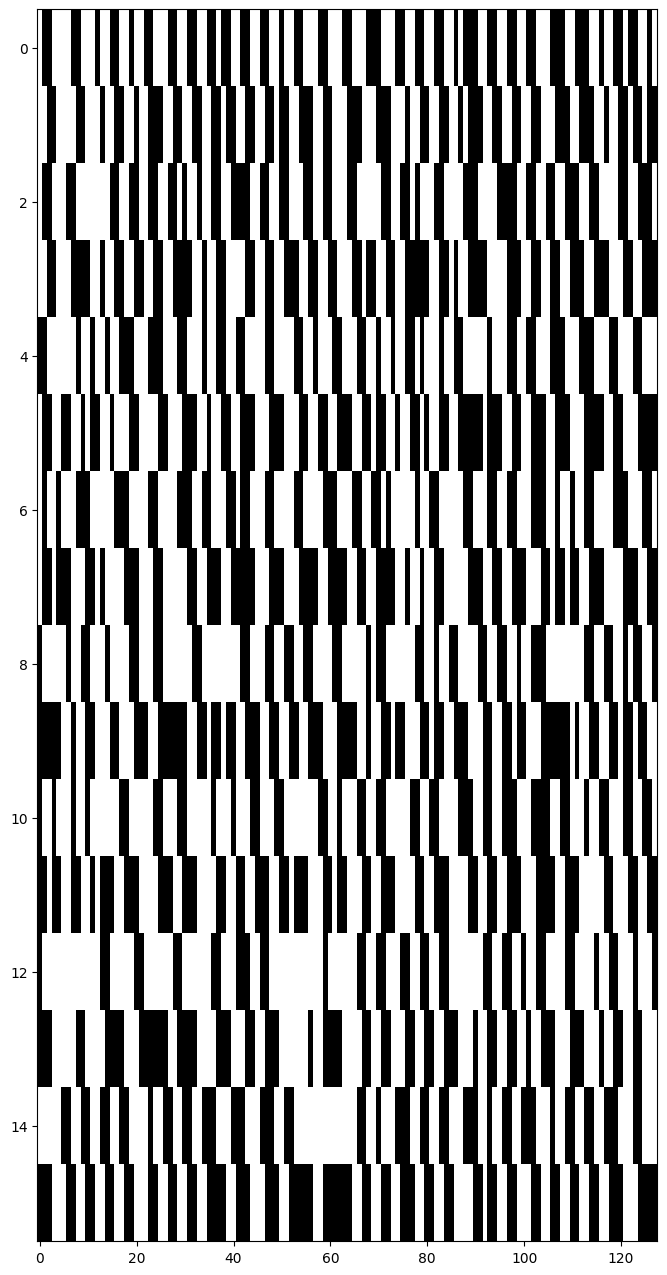

In [16]:


# 1) swap the last two axes → shape (8, 2, 128)
tmp = iris_codes.transpose(0, 2, 1)

# 2) merge the first two axes → shape (16, 128)
iris_codes_2row = tmp.reshape(-1, tmp.shape[-1])


plt.figure(figsize=(8, 16))
plt.imshow(iris_codes_2row, cmap='gray', aspect='auto')

### bands

Image dimensions: 470x1410


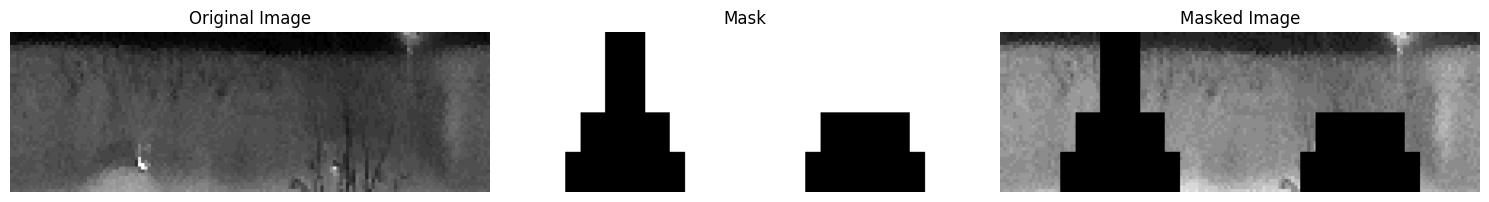

Mask shape: (470, 1410)
Percentage of mask that is True: 74.09%


In [17]:
masked_image, full_mask = create_and_visualize_mask(sample_image)

In [18]:
rows_list, collapsed = bands_with_collapse(sample_image, full_mask, plot=True)

In [19]:
for i in range(1, 8):
    print(rows_list[i].shape)

(1, 1292)
(1, 1292)
(1, 1292)
(1, 886)
(1, 886)
(1, 706)
(1, 706)


In [20]:
collapsed[1]

array([[ True,  True,  True, ...,  True,  True,  True]], shape=(1, 1292))

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (8, 1) + inhomogeneous part.

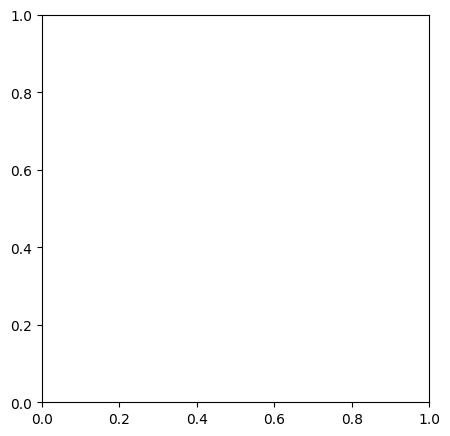

In [21]:
plt.figure(figsize=(5, 15))
plt.imshow(collapsed, cmap="gray")
plt.axis("off")

### Gabor decomposition

In [ ]:
coeffs_per_band = []
bits_per_band   = []

for band_idx, row in enumerate(rows_list):
    coeffs, bits = gabor_decompose_row(row, num_coeffs=16)
    coeffs_per_band.append(coeffs)
    bits_per_band.append(bits)

print(bits_per_band[0])

In [ ]:
iris_code = build_iris_code(rows_list, num_coeffs=128)
print(iris_code.shape)
plot_iris_code(iris_code)

# Comparison

We'll take the same person, but 2 different pupils - right and left, and we'll see who similar/different they are

## same person

In [ ]:
left_iris = imread("data/extracted_irises/left/38-1.png")[:, :, 0]
right_iris = imread("data/extracted_irises/right/38-1.png")[:, :, 0]

left_code = image_to_iris_code(left_iris)
right_code = image_to_iris_code(right_iris)

compare_codes(left_code, right_code)

## different person

In [ ]:
person_1_iris = imread("data/extracted_irises/left/38-1.png")[:, :, 0]
person_2_iris = imread("data/extracted_irises/right/37-1.png")[:, :, 0]

person_1_code = image_to_iris_code(person_1_iris)
person_2_code = image_to_iris_code(person_2_iris)

compare_codes(person_1_code, person_2_code)

## same person, same eye

In [ ]:
person_1_iris = imread("data/extracted_irises/left/17-3.png")[:, :, 0]
person_2_iris = imread("data/extracted_irises/left/17-4.png")[:, :, 0]

person_1_code = image_to_iris_code(person_1_iris)
person_2_code = image_to_iris_code(person_2_iris)

compare_codes(person_1_code, person_2_code)

In [ ]:
iris_codes = []
filenames = []

start_index = 6
# Process the first 5 iris images
for filename in os.listdir(extracted_irises_dir+"/left")[start_index:start_index+10]:
    if filename.endswith(".png"):
        print(f"Processing: {filename}")
        image = imread(os.path.join(extracted_irises_dir, "left", filename))[:, :, 0]
        iris_code = image_to_iris_code(image)
        iris_codes.append(iris_code)
        filenames.append(filename)

# Calculate Hamming distances between the first iris code and all others
if iris_codes:
    reference_code = iris_codes[0]
    distances = []
    
    # Calculate distances and print them
    for i, code in enumerate(iris_codes):
        distance = hamming_distance(reference_code, code)
        distances.append(distance)
        print(f"Hamming distance between {filenames[0]} and {filenames[i]}: {distance:.4f}")
    
    # Plot the distances
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(distances)), distances)
    plt.axhline(y=0.5, color='r', linestyle='--', label='Random match threshold (0.5)')
    plt.xticks(range(len(distances)), filenames, rotation=45)
    plt.xlabel('Iris Images')
    plt.ylabel('Hamming Distance')
    plt.title(f'Hamming Distance from Reference Image ({filenames[0]})')
    plt.ylim(0, 1)  # Hamming distance is between 0 and 1
    plt.tight_layout()
    plt.legend()
    plt.show()
    
    # Also visualize a comparison between the reference code and one other code
    if len(iris_codes) > 1:
        # Import the function we created earlier or define it here
        def plot_iris_code_comparison(left_code, right_code, cmap="gray"):
            """
            Visualise the comparison between two iris codes.
            Shows left code, right code, and their differences.
            """
            # Calculate the differences between the codes
            differences = left_code != right_code
            
            # Create figure with subplots
            fig, axes = plt.subplots(1, 3, figsize=(15, 3))
            
            # Plot reference code
            axes[0].imshow(left_code, cmap=cmap, aspect="auto", interpolation="nearest")
            axes[0].set_title(f'Reference Code ({filenames[0]})')
            axes[0].axis("off")
            
            # Plot second code
            axes[1].imshow(right_code, cmap=cmap, aspect="auto", interpolation="nearest")
            axes[1].set_title(f'Comparison Code ({filenames[1]})')
            axes[1].axis("off")
            
            # Plot differences
            axes[2].imshow(differences, cmap="Reds", aspect="auto", interpolation="nearest")
            axes[2].set_title(f'Differences (HD: {hamming_distance(left_code, right_code):.4f})')
            axes[2].axis("off")
            
            plt.tight_layout()
            plt.show()
        
        # Compare reference code with the second code
        plot_iris_code_comparison(reference_code, iris_codes[1])